<a href="https://colab.research.google.com/github/edmanft/edmanft/blob/main/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Modelo

Queremos resolver la ecuación reversible $X_1 → X_2$-

En la práctica anterior hice Euler con Odeint (una función de scipy) en vez de implementarlo a mano. No sabía que había que hacer el algoritmo a mano. Aquí sí lo hago a mano. 

# Código

Primero vamos a hacer un plot de la solución analítica, para luego comparar con el resultado de la ecuación diferencial.

In [28]:
# CONSTANTS
x_1_i = 1
x_2_i = 0.5
k = 1
t_f = 10

def conc_determ(x_1_i, x_2_i, k, t_f):
  t_vec = np.linspace(0, t_f, 1000)
  x_1_t = x_1_i * np.exp(-1*k*t_vec)
  x_2_t = x_2_i + x_1_i*(1-np.exp(-1*k*t_vec))

  return t_vec, x_1_t, x_2_t 



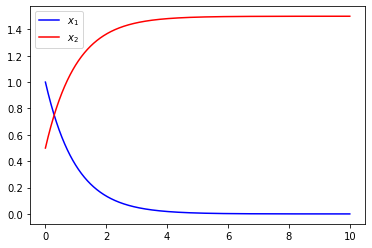

In [29]:
t_vec, x_1_t, x_2_t = conc_determ(x_1_i, x_2_i, k, t_f)

plt.plot(t_vec, x_1_t, "b-")
plt.plot(t_vec, x_2_t, "r-")
plt.legend(["$x_1$", "$x_2$"])

plt.show()

Ploteamos la relación de la ley de acción de masas para ver si se cumple.

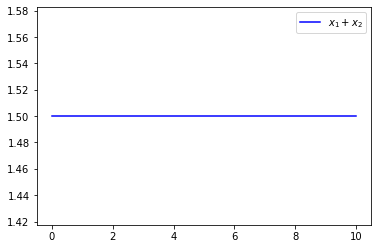

In [10]:
plt.plot(t_vec, x_1_t + x_2_t, "b-")
plt.legend(["$x_1+x_2$"])

Ahora vamos a resolverlo numéricamente, con odeint de scipy.

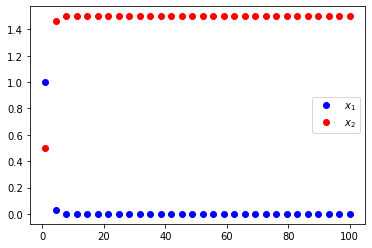

In [12]:
def deriv(x_1_t, t_vec , k):
  return -1*k*x_1_t

t_vec_num = np.linspace(1,100,30)

x_1_t_num = odeint(deriv, x_1_i, t_vec_num, args = (k,))

plt.plot(t_vec_num, x_1_t_num, "bo")
plt.plot(t_vec_num, x_1_i + x_2_i - x_1_t_num, "ro")
plt.legend(["$x_1$", "$x_2$"])

In [ ]:
x_1_t[0]
x_2_t[0]

0.5

Comparamos la solución analítica con la solución numérica:

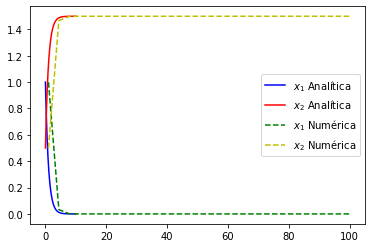

In [13]:
plt.plot(t_vec, x_1_t, "b-")
plt.plot(t_vec, x_2_t, "r-")




plt.plot(t_vec_num, x_1_t_num, "g--", )
plt.plot(t_vec_num, x_1_i + x_2_i - x_1_t_num, "y--")
plt.legend(["$x_1$ Analítica", "$x_2$ Analítica",
            "$x_1$ Numérica", "$x_2$ Numérica" ])
plt.show()


Now we implement our own Euler method function


In [26]:
def euler(x_0, k, nt, dt):

  x_t = list()
  t_vec = list()
  x_t.append(x_0)
  t_vec.append(0)
  for i in range(nt):
    x_t.append(x_t[-1] - dt*k*x_t[-1])
    t_vec.append(i*dt)
  return np.asarray(t_vec), np.asarray(x_t)


In [61]:
x_1_i = 1
x_2_i = 2
k = 1
t_f = 10
dt = 0.05
nt = int(t_f/dt)
t_vec_num, x_t_num = euler(x_1_i, k, nt, dt)

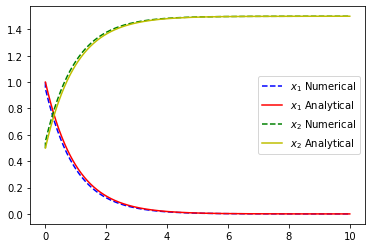

In [32]:
plt.plot()
plt.plot(t_vec_num, x_t_num, "b--")
plt.plot(t_vec, x_1_t, "r-")
plt.plot(t_vec_num,x_1_i + x_2_i - x_t_num, "g--")
plt.plot(t_vec, x_1_i + x_2_i - x_1_t, "y-")
plt.legend(["$x_1$ Numerical", "$x_1$ Analytical", "$x_2$ Numerical", 
            "$x_2$ Analytical"])



Now we want to make the reversible process: $X_1 ↔ X_2$

In [76]:
def euler_rev(x_1_i, x_2_i, k1, k2, nt, dt):
  x_1_t = list()
  x_1_t.append(x_1_i)
  t_vec_num = list()
  t_vec_num.append(0)
  c_0 = x_1_i + x_2_i

  for i in range(nt):
    x_t = dt*( -1*(k1+k2)*x_1_t[-1] + k2*c_0 ) + x_1_t[-1]
    x_1_t.append(x_t)
    t_vec_num.append(i*dt)
  
  return np.asarray(t_vec_num), np.asarray(x_1_t)




In [88]:
x_1_i = 1
x_2_i = 0.5
k1 = 1
k2 = 0.5
t_f = 10
dt = 0.05
nt = int(t_f/dt)

t_vec_num, x_t_1_num = euler_rev(x_1_i, x_2_i, k1, k2, nt, dt)

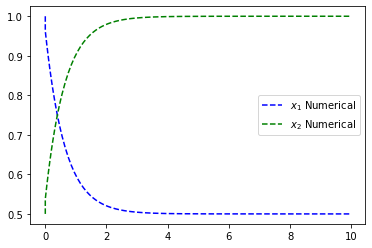

In [78]:
x_t_2_num = x_1_i + x_2_i - x_t_1_num

plt.plot()
plt.plot(t_vec_num, x_t_1_num, "b--")
plt.plot(t_vec_num,x_t_2_num, "g--")
plt.legend(["$x_1$ Numerical",  "$x_2$ Numerical"])

We check the law-mass action

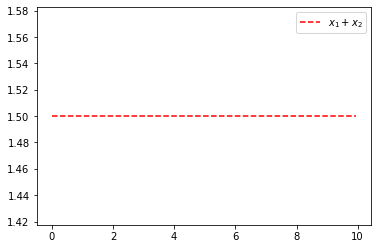

In [79]:
plt.plot()
plt.plot(t_vec_num, x_t_1_num + x_t_2_num, "r--")
plt.legend(["$x_1+x_2$"])

Now we do it numerically to check if it is correct: 

In [80]:
def exact_rev(x_1_i, x_2_i, k1, k2, t_vec_num):

  term_1 = k2*(x_1_i + x_2_i)/(k1+k2)
  term_2 = ((k1*x_1_i - k2*x_2_i)/(k1+k2))*np.exp(-1*(k1+k2)*t_vec_num)
  return term_1 + term_2



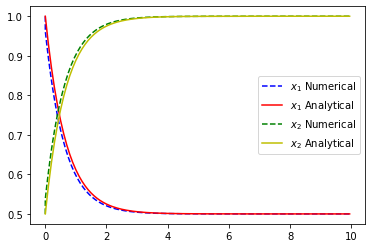

In [81]:
x_1_exact = exact_rev(x_1_i, x_2_i, k1, k2, t_vec_num)
x_2_exact = x_1_i + x_2_i - x_1_exact

plt.plot()
plt.plot(t_vec_num, x_t_1_num, "b--")
plt.plot(t_vec_num, x_1_exact, "r-")
plt.plot(t_vec_num,x_t_2_num, "g--")
plt.plot(t_vec_num, x_2_exact, "y-")
plt.legend(["$x_1$ Numerical", "$x_1$ Analytical", "$x_2$ Numerical", 
            "$x_2$ Analytical"])

We see it works just fine. 

Now we use odeint for the reversible equation.

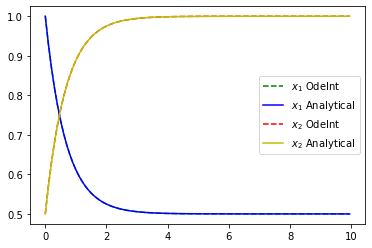

In [90]:
def deriv_rev(x_1_t, t_vec, x_1_i, x_2_i, k1, k2):
  return -1*(k1 + k2)*x_1_t + k2*(x_1_i + x_2_i)


x_1_t_ode = odeint(deriv_rev, x_1_i, t_vec_num, args = (x_1_i, x_2_i, k1, k2,)  )

plt.plot(t_vec_num, x_1_t_ode, "g--")
plt.plot(t_vec_num, x_1_exact, "b-")

plt.plot(t_vec_num, x_1_i + x_2_i - x_1_t_ode, "r--")
plt.plot(t_vec_num, x_2_exact, "y-")

plt.legend(["$x_1$ OdeInt", "$x_1$ Analytical", "$x_2$ OdeInt", 
            "$x_2$ Analytical"])

The convergence appears to be perfect. In contrast with Euler method where small differences between the numerical and analytical solutions where appreciable.



Bonus: open system where $X_1 → 0$ with $k_3 = 0.01$

In [106]:
def deriv_open(x_t, t_vec, k1, k2, k3):
  "x_t is a array of [x_1, x_2]"
  x1, x2 = x_t
  return [-k1*x1 + k2*x2- k3*x1, k1*x1-k2*x2]
t_vec = np.linspace(0,100,10000)
x_0 = [x_1_i, x_2_i]
k3 = 0.01
x_t_open = odeint(deriv_open, x_0, t_vec, args = ( k1, k2, k3,)  )

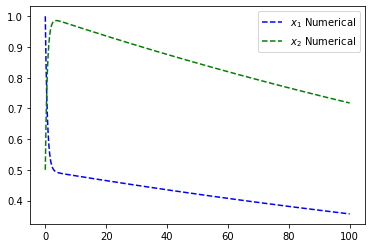

In [107]:
x_1_open = x_t_open[:, 0]
x_2_open = x_t_open[:, 1]
plt.plot()
plt.plot(t_vec, x_1_open, "b--")
plt.plot(t_vec,x_2_open, "g--")
plt.legend(["$x_1$ Numerical",  "$x_2$ Numerical"])

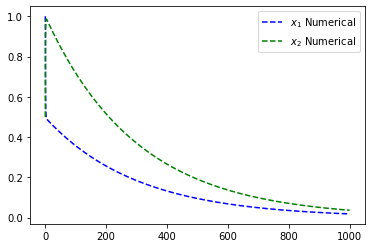

In [108]:
t_vec = np.linspace(0,1000,10000)
x_0 = [x_1_i, x_2_i]
k3 = 0.01
x_t_open = odeint(deriv_open, x_0, t_vec, args = ( k1, k2, k3,)  )
x_1_open = x_t_open[:, 0]
x_2_open = x_t_open[:, 1]
plt.plot()
plt.plot(t_vec, x_1_open, "b--")
plt.plot(t_vec,x_2_open, "g--")
plt.legend(["$x_1$ Numerical",  "$x_2$ Numerical"])

We can see that it loses matter over time